# **_CAR PRICE PREDICTION USING MACHINE LEARNING_**

#### Car price prediction program is executed with the help of car dekhko dataset, where based on the given features, such as the year the car bought and how much kilometers driven and the fuel type of the car, the seller type based on which the seller sells the car, either the seller may be individual or a dealer, and the owner of a car indicates a first owner, a second owner or a third and more owner which alters the selling price of the car, and the type by which car differs is the transmission of the car, which is either manual or automatic driven cars.

#### So based on the given data, 
#### Independent variable (X) : Name, year, km_driven, fuel, seller_type, transmission, owner
#### Dependent variable (Y) : selling_price

#### Based on the given data we can identify this as a regression problem, so we can use various machine learning problems to solve this problem which are as follows:
* Linear regression
* Lasso regression
* Ridge regression
* Decision tree regressor
* Random forest regressor

#### I have declared this problem with random forest regression, since linear regression model doesn't gave me much accuracy.

#### Machine learning model  : Random forest regressor (sklearn)
#### Data preprocessing      : Pandas 
#### Data visualization      : Matplotlib, Seaborn
#### Web framework           : Flask
#### Model deployment        : Heroku platform

#### Dataset link : https://www.kaggle.com/datasets/mohamedsamir3/car-price-details
#### Heroku link : 
#### Github link : https://github.com/Vedakeerthi/CAR_PRICE_PREDICTION

### Importing the dataset using pandas 

In [32]:
import pandas as pd
raw_data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.xls')
raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Printing the categorical feature's unique values

In [33]:
print('Fuel types : ',raw_data['fuel'].unique())
print('Seller_type types : ',raw_data['seller_type'].unique())
print('Transmission types : ',raw_data['transmission'].unique())
print('Owner types : ',raw_data['owner'].unique())

Fuel types :  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Seller_type types :  ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission types :  ['Manual' 'Automatic']
Owner types :  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


### Checking the missing values in the raw_data

In [34]:
raw_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Describing the dataset

In [35]:
raw_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### changing the feature year into how old the car is

In [36]:
raw_data['year'] = 2022 - raw_data['year']

In [37]:
raw_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,15,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,15,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,10,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,5,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,8,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),8,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,8,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,13,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,6,865000,90000,Diesel,Individual,Manual,First Owner


### Removing the feature car name since it doesn't have any relation with the dependent variable

In [40]:
df = raw_data.drop(columns='name')

In [44]:
df = df.rename(columns={'year':'no_of_years'})

In [45]:
df

,no_of_years,selling_price,km_driven,fuel,seller_type,transmission,owner
0,15,60000,70000,Petrol,Individual,Manual,First Owner
1,15,135000,50000,Petrol,Individual,Manual,First Owner
2,10,600000,100000,Diesel,Individual,Manual,First Owner
3,5,250000,46000,Petrol,Individual,Manual,First Owner
4,8,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,8,409999,80000,Diesel,Individual,Manual,Second Owner
4336,8,409999,80000,Diesel,Individual,Manual,Second Owner
4337,13,110000,83000,Petrol,Individual,Manual,Second Owner
4338,6,865000,90000,Diesel,Individual,Manual,First Owner


### Performing one hot encoding on the categorical features of the dataset

In [46]:
df = pd.get_dummies(df,drop_first=True)

In [48]:
df.head()

,no_of_years,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,15,60000,70000,0,0,0,1,1,0,1,0,0,0,0
1,15,135000,50000,0,0,0,1,1,0,1,0,0,0,0
2,10,600000,100000,1,0,0,0,1,0,1,0,0,0,0
3,5,250000,46000,0,0,0,1,1,0,1,0,0,0,0
4,8,450000,141000,1,0,0,0,1,0,1,0,1,0,0


### Correlation between features

In [53]:
correlation = df.corr()
correltaion_features = correlation.index

### Importing the data visualization modules

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

### Making a pairplot between the features

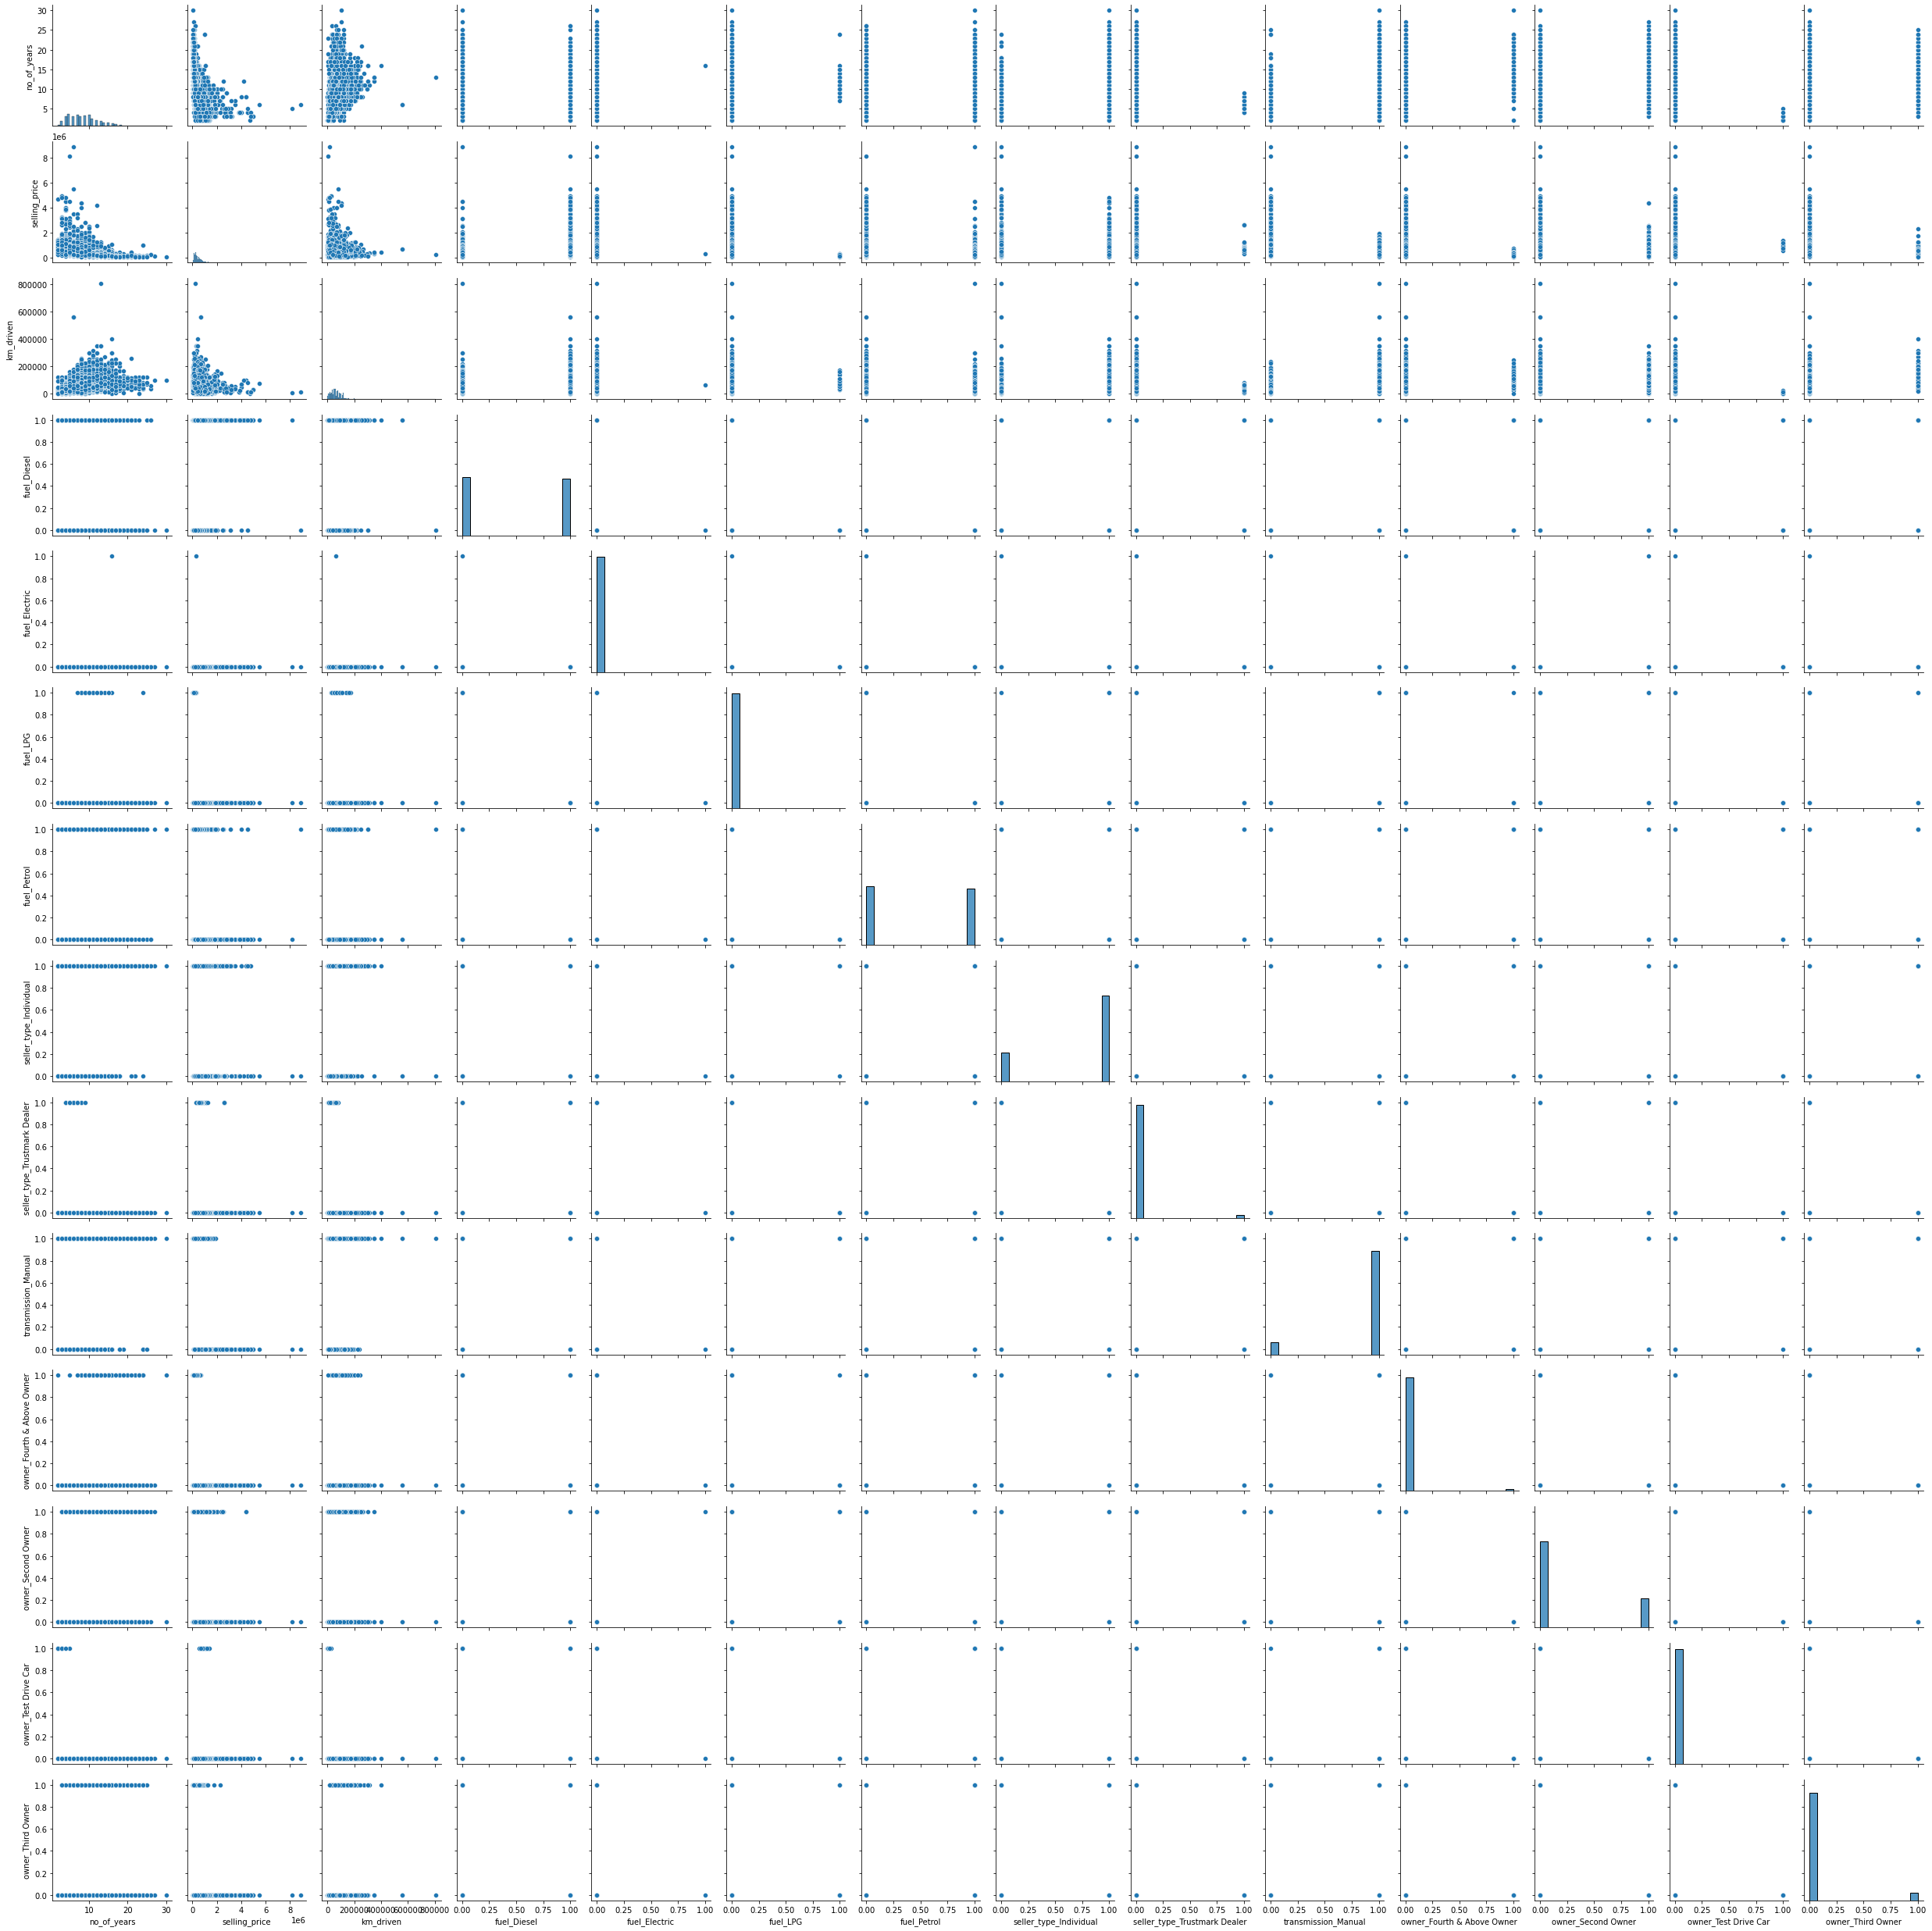

In [55]:
sns.pairplot(df)

### A heatmap to indicate the correlation of features 

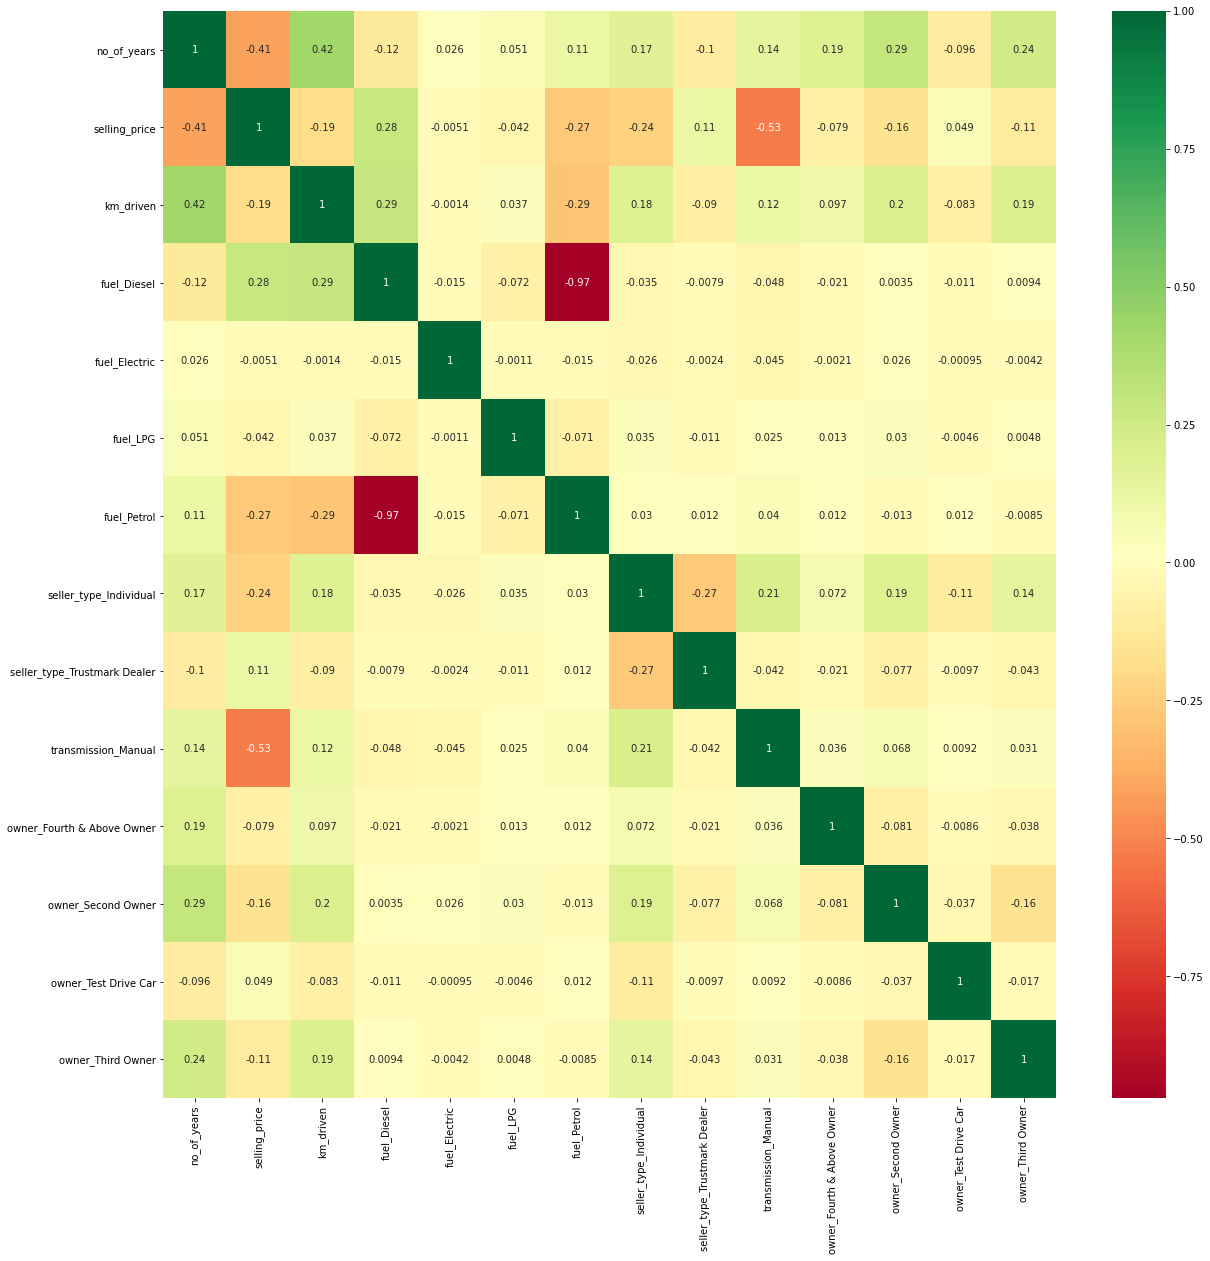

In [59]:
plt.figure(figsize=(20,20))
gm = sns.heatmap(df[correltaion_features].corr(),annot=True,cbar=True,cmap='RdYlGn')

### X - Independent variable

In [66]:
X = df.drop(columns=['fuel_Petrol','selling_price'])

### Y - Dependent variable

In [103]:
Y = df[['selling_price']]

In [175]:
X

,no_of_years,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,15,70000,0,0,0,1,0,1,0,0,0,0
1,15,50000,0,0,0,1,0,1,0,0,0,0
2,10,100000,1,0,0,1,0,1,0,0,0,0
3,5,46000,0,0,0,1,0,1,0,0,0,0
4,8,141000,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,8,80000,1,0,0,1,0,1,0,1,0,0
4336,8,80000,1,0,0,1,0,1,0,1,0,0
4337,13,83000,0,0,0,1,0,1,0,1,0,0
4338,6,90000,1,0,0,1,0,1,0,0,0,0


In [105]:
Y.shape

(4340, 1)

### Finding the important features using ExtraTreesRegressor

In [106]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor().fit(X,Y)

<ipython-input-106-4a740159c6c1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr = ExtraTreesRegressor().fit(X,Y)


In [107]:
print(etr.feature_importances_)

[2.51494880e-01 2.45009461e-01 1.29728729e-01 5.60455393e-05
 5.55480814e-05 4.64060487e-02 8.00618362e-03 2.92851481e-01
 7.36830264e-04 2.07913006e-02 5.67631517e-04 4.29586121e-03]


### Plotting the important features

[]

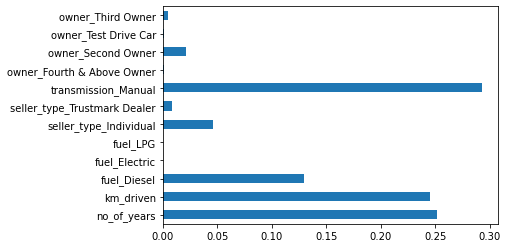

In [108]:
feature_imp = pd.Series(etr.feature_importances_,index=X.columns)
feature_imp.plot(kind='barh')
plt.plot()

### Splitting the dataset for training and testing

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3472, 12) (3472, 1) (868, 12) (868, 1)


### Performing a linear regression over the data

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
print(model.score(x_train,y_train))
#As the score is very low we will be using random forest 

0.4602006720217099


### Performing a random forest regression over the data since the score of linear regression is very low

In [130]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model.fit(x_train,y_train)

In [131]:
#model.score(x_train,y_train)

### Hyper parameters for random regression model

In [160]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=20)]
print(n_estimators)
max_features =['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

[100, 157, 215, 273, 331, 389, 447, 505, 563, 621, 678, 736, 794, 852, 910, 968, 1026, 1084, 1142, 1200]


### Finding the best parameters using randomizedcv

In [133]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 157, 215, 273, 331, 389, 447, 505, 563, 621, 678, 736, 794, 852, 910, 968, 1026, 1084, 1142, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


### Applying the randomized search cv

In [136]:
model_with_best_parameters = RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,verbose=2,cv=5,random_state=42,n_jobs=1)

In [137]:
model_with_best_parameters.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.4s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.6s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=794; total time=   2.6s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=794; total time=   2.4s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=794; total time=   2.8s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=794; total time=   1.7s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=794; total time=   2.8s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=794; total time=   1.7s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=794; total time=   2.1s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=794; total time=   2.5s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=794; total time=   2.0s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=794; total time=   1.9s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=447; total time=   0.8s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=447; total time=   0.8s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=447; total time=   0.7s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=447; total time=   0.6s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=447; total time=   0.6s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=447; total time=   1.4s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=447; total time=   1.4s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=447; total time=   1.5s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=447; total time=   1.9s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=447; total time=   1.6s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=331; total time=   1.3s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=331; total time=   1.1s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=331; total time=   1.2s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=331; total time=   1.3s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=331; total time=   1.1s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=736; total time=   1.9s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=736; total time=   1.8s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=736; total time=   2.1s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=736; total time=   1.7s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=736; total time=   2.2s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.4s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.3s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.0s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.5s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.0s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=678; total time=   2.5s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=678; total time=   2.7s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=678; total time=   1.8s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=678; total time=   1.6s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=678; total time=   2.0s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=389; total time=   1.0s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=389; total time=   1.5s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=389; total time=   1.8s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=389; total time=   1.2s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=389; total time=   1.7s


C:\Users\veda keerthi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 157, 215, 273,
                                                         331, 389, 447, 505,
                                                         563, 621, 678, 736,
                                                         794, 852, 910, 968,
                                                         1026, 1084, 1142,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### Predicting the value x_test in the model with best parameters (randomizedsearchcv model)

In [139]:
y_pred = model_with_best_parameters.predict(x_test)

### Plotting the actual value with predicted value using distplot

### (i) y_test plot

<AxesSubplot:ylabel='Density'>

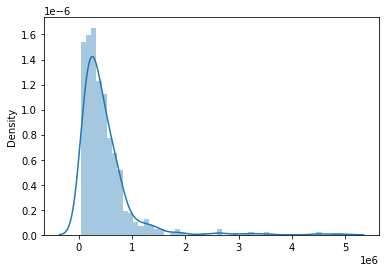

In [144]:
sns.distplot(y_test)

### (ii) y_pred plot

C:\Users\veda keerthi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

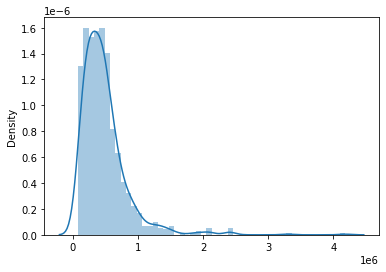

In [145]:
sns.distplot(y_pred)

### Dumping the model as pickle file for deployment

In [169]:
import pickle as pl
file = open('Car_prediction.pkl','wb')
pl.dump(model_with_best_parameters,file)